In [1]:
import time
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=False -> do not returen pandas data -> return numpy!!
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [2]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
print(y_test.shape)

(10000,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
past = time.time()
rnd_clf.fit(X_train, y_train)
now = time.time()
print("Not reduced elapsed time: ", now - past)
y_pred = rnd_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, y_pred))

Not reduced elapsed time:  25.078826189041138
accuracy:  0.9682


In [6]:

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

reduced_rnd_clf_pipeline = Pipeline([
    ("pca",PCA(n_components=0.95)),
    ("rnd_clf", RandomForestClassifier()),
])

past = time.time()
reduced_rnd_clf_pipeline.fit(X_train, y_train)
now = time.time()

print("Not reduced elapsed time: ", now - past)
y_pred = reduced_rnd_clf_pipeline.predict(X_test)
print("accuracy: ", accuracy_score(y_test, y_pred))




Not reduced elapsed time:  67.42471170425415
accuracy:  0.9479


In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_train_reduced = tsne.fit_transform(X_train)


/home/dongho/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dongho/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [48]:
import matplotlib.pyplot as plt
X_reduced_split = [[] for i in range(10)]
for index, data in enumerate(X_train_reduced):
    X_reduced_split[int(y_train[index])].append([data[0], data[1]])
X_reduced_numpy = []
for i in range(10):
    X_reduced_numpy.append(np.array(X_reduced_split[i]))
    

In [44]:
X_reduced_numpy

array([list([[20.600199, 23.409245], [20.751888, 29.484343], [18.140797, 15.823067], [18.41107, 17.977606], [32.184402, 27.656197], [36.005733, 25.052021], [20.087473, 27.07651], [40.47142, 30.658243], [26.115229, 12.409107], [21.200684, 16.644497], [21.276365, 16.884579], [35.912273, 21.502277], [22.17578, 14.86402], [40.6294, 32.077755], [33.631733, 35.50729], [29.109804, 19.114185], [20.167772, 30.070662], [35.78156, 32.348095], [28.9796, 35.311924], [21.982233, 14.544155], [25.915308, 17.26641], [33.877705, 29.686708], [38.694347, 30.783047], [33.552002, 17.506863], [29.751858, 11.361746], [38.65408, 28.868147], [26.80437, 9.692144], [28.021328, 14.632262], [38.56573, 27.211218], [38.90568, 31.664143], [30.000202, 39.57427], [36.759525, 31.780323], [30.684046, 22.871302], [30.373423, 19.982014], [22.891748, 24.03213], [25.439442, 13.740758], [26.343048, 17.939304], [27.867693, 25.30849], [21.845055, 26.254816], [23.738691, 25.78879], [36.59459, 31.96337], [34.869236, 33.658863], [4

In [49]:
print(type(X_reduced_numpy[0]))

<class 'numpy.ndarray'>


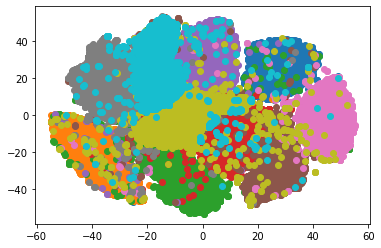

In [51]:
for i in range(10):
    plt.scatter(np.array(X_reduced_numpy[i][:,0]),np.array(X_reduced_numpy[i][:,1]) )
plt.show()

In [58]:
img = plt.imread("1647417029951_28_28.jpg")
print(img[0][0][0])

181


In [62]:
img_np = np.array(img)

In [64]:
img_np[:,:,0]

array([[181, 188, 184, 185, 185, 183, 186, 181, 188, 182, 180, 184, 184,
        182, 182, 183, 183, 179, 183, 184, 185, 184, 180, 184, 184, 183,
        183, 184],
       [185, 180, 186, 183, 183, 185, 179, 188, 182, 184, 185, 180, 184,
        181, 181, 176, 185, 185, 185, 180, 181, 182, 180, 184, 181, 181,
        182, 184],
       [185, 184, 190, 185, 184, 183, 186, 182, 185, 187, 182, 178, 182,
        182, 181, 184, 182, 178, 177, 185, 179, 179, 186, 180, 183, 181,
        182, 184],
       [185, 183, 179, 186, 183, 182, 187, 183, 180, 185, 181, 178, 184,
        182, 182, 179, 183, 177, 185, 179, 184, 179, 179, 185, 184, 182,
        183, 186],
       [183, 186, 187, 180, 185, 187, 181, 182, 156,  13,  25,  23,  78,
         21,  25,  28,  42,  19, 125, 144, 181, 181, 182, 184, 180, 179,
        179, 182],
       [183, 185, 181, 185, 182, 176,  25,  27,  16,  76,  21,  38,  22,
         30,  34,  29,  42,  25,  28,  35,  32,  20, 185, 181, 183, 183,
        183, 183],
       [18

In [65]:
rnd_clf.predict([img_np.reshape(7)])

ValueError: X has 2352 features, but RandomForestClassifier is expecting 784 features as input.